# Code Louisville Python / SQL Project Summer 2019 
---

## Imports

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Setting up the databases

In [2]:
# Importing CSV files into Jupyter Notebook
happiness2015 = pd.read_csv("world_happiness_2015.csv")
happiness2016 = pd.read_csv("world_happiness_2016.csv")
happiness2017 = pd.read_csv("world_happiness_2017.csv")
happiness2019 = pd.read_csv("world-happiness-report-2019.csv")

In [3]:
# Creating the SQLLite databases and ignoring the warnings about spacing that are irrelevant
import warnings;
warnings.filterwarnings('ignore');
happiness2015.to_sql('happiness2015', sqlite3.connect('happiness2015.db'), if_exists = "replace")
happiness2016.to_sql('happiness2016', sqlite3.connect('happiness2016.db'), if_exists = "replace")
happiness2017.to_sql('happiness2017', sqlite3.connect('happiness2017.db'), if_exists = "replace")
happiness2019.to_sql('happiness2019', sqlite3.connect('happiness2019.db'), if_exists = "replace")

In [4]:
# Connection to SQL databases
connection1 = sqlite3.connect('happiness2015.db')
connection2 = sqlite3.connect('happiness2016.db')
connection3 = sqlite3.connect('happiness2017.db')
connection4 = sqlite3.connect('happiness2019.db')

---
## Initial Analysis
Since I will be comparing data from the different columns within each of these three datasets I want to make sure they're comparable.

In [5]:
happiness2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
happiness2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [7]:
happiness2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [8]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [9]:
happiness2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.0+ KB


In [10]:
happiness2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


It looks as though for the most part the columns are comparable within the data. I was hoping for the region to be available for all three years but unfortunatley this isn't the case. Data appears to be in the correct type and it looks like 'Country', 'Happiness Rank', 'Happiness Score' and 'Freedom' are common in all three sets of data. I will be structuring my analysis and prediction around these columns. 

---
## Question One : According to the data, which countries are the top five happiest countries in 2015, 2016 and 2017?

In [11]:
query = '''SELECT Country FROM happiness2015 WHERE "Happiness Rank" BETWEEN 0 and 5;'''

In [12]:
happiness2015top5 = pd.read_sql_query(query, connection1)
happiness2015top5

,Country
0,Switzerland
1,Iceland
2,Denmark
3,Norway
4,Canada


In [13]:
query2 = '''SELECT Country FROM happiness2016 WHERE "Happiness Rank" BETWEEN 0 and 5;'''

In [14]:
happiness2016top5 = pd.read_sql_query(query2, connection2)
happiness2016top5

,Country
0,Denmark
1,Switzerland
2,Iceland
3,Norway
4,Finland


In [15]:
query3 = '''SELECT Country FROM happiness2017 WHERE "Happiness.Rank" BETWEEN 0 and 5;'''

In [16]:
happiness2017top5 = pd.read_sql_query(query3, connection3)
happiness2017top5

,Country
0,Norway
1,Denmark
2,Iceland
3,Switzerland
4,Finland


Analysis : It appears as though the top five countires within each year have been pretty consistent with Canada outranking Finland in 2015 but dropping down after that. Norway is the most recent happiest country according to this data set.

---
## Question Two : How did perceived freedoms correlate with countries happiness rank?

In [17]:
happiness2015.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


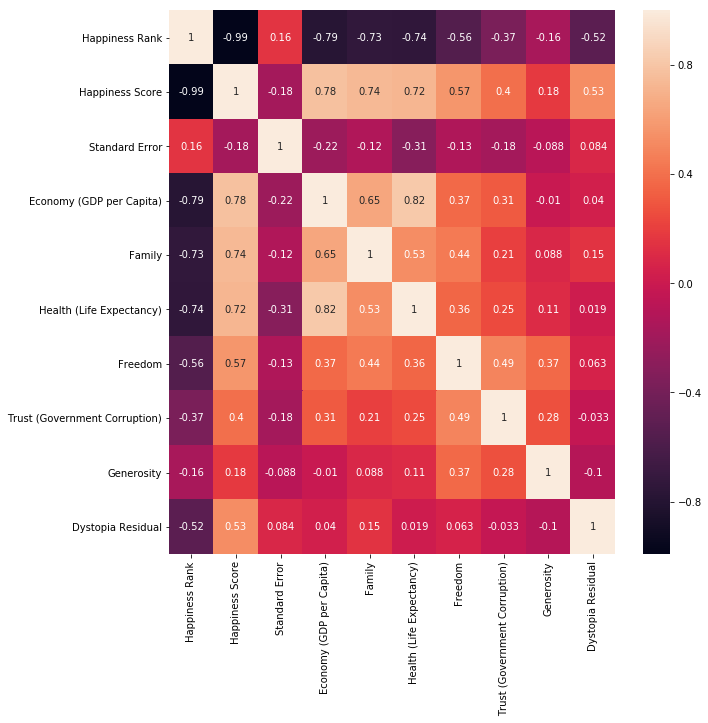

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(happiness2015.corr(), annot=True)

In [19]:
happiness2016.corr()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.995743,-0.994928,-0.995525,-0.793577,-0.733276,-0.767991,-0.557169,-0.387102,-0.145369,-0.542616
Happiness Score,-0.995743,1.000000,0.999485,0.999474,0.790322,0.739252,0.765384,0.566827,0.402032,0.156848,0.543738
Lower Confidence Interval,-0.994928,0.999485,1.000000,0.997919,0.790673,0.741523,0.769177,0.566857,0.404840,0.158025,0.538793
Upper Confidence Interval,-0.995525,0.999474,0.997919,1.000000,0.789140,0.736184,0.760752,0.566203,0.398775,0.155495,0.548164
Economy (GDP per Capita),-0.793577,0.790322,0.790673,0.789140,1.000000,0.669540,0.837067,0.362283,0.294185,-0.025531,0.068624
Family,-0.733276,0.739252,0.741523,0.736184,0.669540,1.000000,0.588377,0.450208,0.213561,0.089629,0.119672
Health (Life Expectancy),-0.767991,0.765384,0.769177,0.760752,0.837067,0.588377,1.000000,0.341199,0.249583,0.075987,0.100857
Freedom,-0.557169,0.566827,0.566857,0.566203,0.362283,0.450208,0.341199,1.000000,0.502054,0.361751,0.091631
Trust (Government Corruption),-0.387102,0.402032,0.404840,0.398775,0.294185,0.213561,0.249583,0.502054,1.000000,0.305930,-0.002909
Generosity,-0.145369,0.156848,0.158025,0.155495,-0.025531,0.089629,0.075987,0.361751,0.305930,1.000000,-0.133001


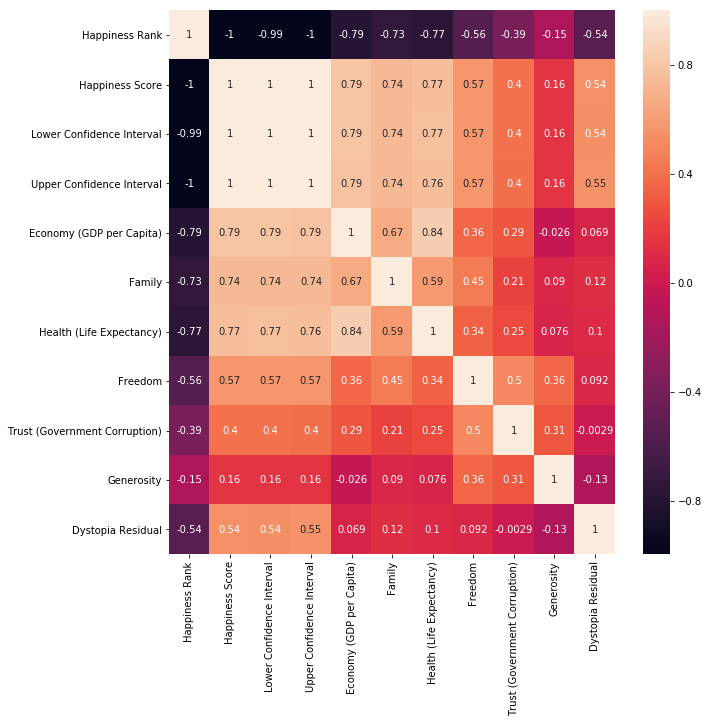

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(happiness2016.corr(), annot=True)

In [21]:
happiness2017.corr()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Happiness.Rank,1.000000,-0.992774,-0.993058,-0.991533,-0.813244,-0.736753,-0.780716,-0.551608,-0.132620,-0.405842,-0.484506
Happiness.Score,-0.992774,1.000000,0.999497,0.999520,0.812469,0.752737,0.781951,0.570137,0.155256,0.429080,0.475355
Whisker.high,-0.993058,0.999497,1.000000,0.998036,0.811868,0.750934,0.776634,0.569907,0.155462,0.426459,0.478824
Whisker.low,-0.991533,0.999520,0.998036,1.000000,0.812267,0.753767,0.786385,0.569808,0.154904,0.431223,0.471505
Economy..GDP.per.Capita.,-0.813244,0.812469,0.811868,0.812267,1.000000,0.688296,0.843077,0.369873,-0.019011,0.350944,0.024226
Family,-0.736753,0.752737,0.750934,0.753767,0.688296,1.000000,0.612080,0.424966,0.051693,0.231841,0.070506
Health..Life.Expectancy.,-0.780716,0.781951,0.776634,0.786385,0.843077,0.612080,1.000000,0.349827,0.063191,0.279752,0.054963
Freedom,-0.551608,0.570137,0.569907,0.569808,0.369873,0.424966,0.349827,1.000000,0.316083,0.499183,0.081926
Generosity,-0.132620,0.155256,0.155462,0.154904,-0.019011,0.051693,0.063191,0.316083,1.000000,0.294159,-0.116627
Trust..Government.Corruption.,-0.405842,0.429080,0.426459,0.431223,0.350944,0.231841,0.279752,0.499183,0.294159,1.000000,-0.022755


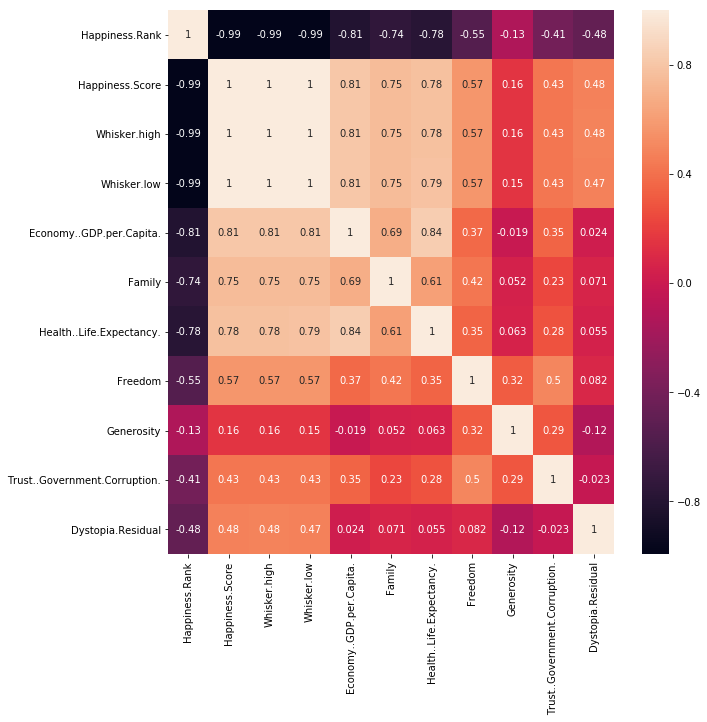

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(happiness2017.corr(), annot=True)

Analysis : Using .corr() which finds the pairwise correlation of all columns in the dataframe and a heatmap to visualize the results I can now make my assessment. Freedom and happiness score didn't correlate quite as impactfully as I would have assumed but as it was just a curious inquiry it's no biggie. 

---
## Question Three :  Which countries are likely to be the happiest in 2019?

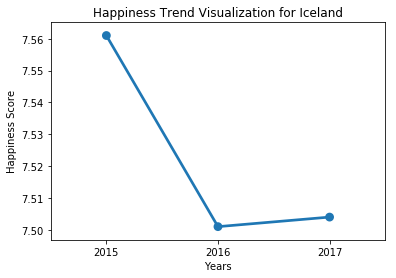

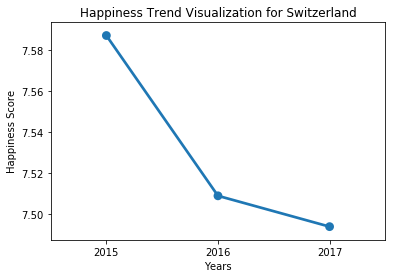

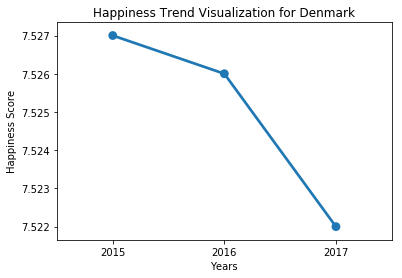

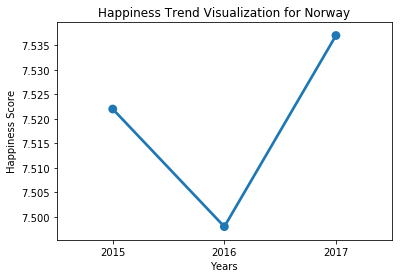

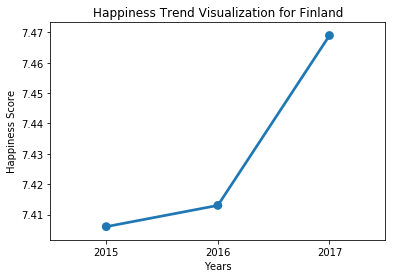

In [23]:
countries = ['Iceland', 'Switzerland', 'Denmark', 'Norway', 'Finland']

for country in countries:
    happiness_score = [happiness2015[happiness2015['Country'] == country]['Happiness Score'].values,
                      happiness2016[happiness2016['Country'] == country]['Happiness Score'].values,
                      happiness2017[happiness2017['Country'] == country]['Happiness.Score'].values]
    years = [2015, 2016, 2017]
    
    this = sns.pointplot(x=years, y=happiness_score)
    plt.title("Happiness Trend Visualization for " + country)
    plt.xlabel("Years")
    plt.ylabel("Happiness Score")
    plt.show()

## Prediction
As the 2019 happiness information is available, using the limited data of only three years and the graphs I just made I will attempt to make a prediction of the top five countries before I've looked at the data from 2019.
My guess, based on the trends in data would be
1. Denmark
2. Finland
3. Norway
4. Iceland
5. Switzerland

In [24]:
happiness2019.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


# Conclusion
Wow. I was almost right! It would have been way cooler if I were right but that's life. Congratulations Netherlands for making it into the top 5! All jokes aside I had fun doing this project and it reinforced what I learned in my treehouse videos so mission accomplished.